In [443]:
import pandas as pd
import numpy as np  
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import pyreadr
from plotnine import *

- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 175857

# Exercício 3

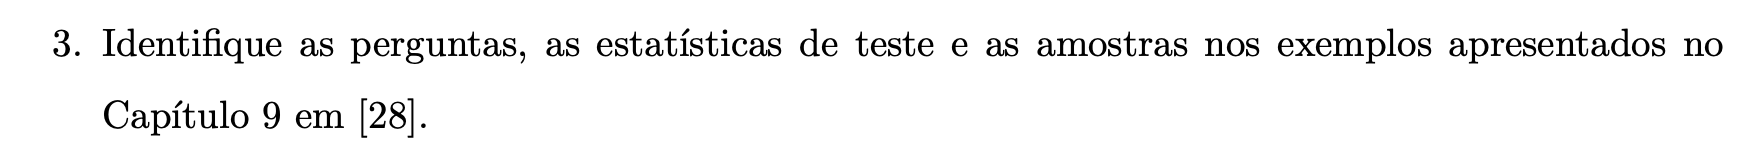

## Diferença de taxa de promoção entre gêneros

A pergunta aqui, é se existe diferença nas taxas de promoção de homens e mulheres, ou seja, se um gênero é privilegiado em relação ao outro. Para isso, duas hipóteses são formuladas:

- H₀: homens são promovidos de maneira igual ou menos frequentemente que mulheres
- H₁: homens são promovidos mais frequentemente que mulheres

A estatística de teste definida foi a diferença entre a proporção de homens e mulheres promovidos promovidos ($p_{m} - p_{f}$). Se este valor for maior que zero, mais homens foram promovidos. Se fo menor ou igual a zero, o caso oposto.

As amostras utilizadas para isso foram dados de uma empresa, contendo um conjunto de funcionários e especificando o gênero e se foram ou não promovidos. Traa-se de um conjunto pequeno, então foi necessário realizar bootstrapping para se obter um resultado mais preciso.

## Diferença entre rating de gêneros de filme

A pergunta levantada foi: "Filmes de romance e ação são avaliados com ratings diferentes".

A estatística de teste utilizada foi a diferença entre as médias dos filmes de ação e romance ($\mu_{a} - \mu_{r}$). Se o valor for menor que zero, filmes de romance possuem os maiores ratings. Se for maior que zero, filmes de ação vencem. Deste modo, se a diferença for zero, não existe diferença na avaliação destes dois gêneros. Para isso, foram propostas duas hipóteses:

- H₀: $\mu_{a} - \mu_{r} = 0$ (Não existe diferença entre as avaliações)
- H₁: $\mu_{a} - \mu_{r} != 0$ (Existe diferença entre as avaliações)

As amostras utilizadas se consistem em dados que possuel o gênero do filme e seu respectivo rating. Aqui, os dados também eram diminutos e foi necessário realizar bootstrapping para melhoar a confiabilidade do teste.



# Exercício 4

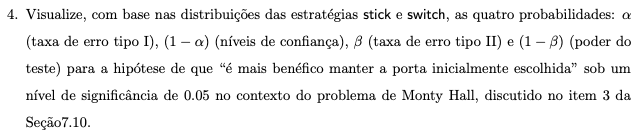

Realizou-se a simulação das estratégias stick e switch através do código abaixo, que realizou 1000 simulações, com 100 amostras cada.

In [444]:
def simulacao_monty_hall(num_amostras: int, troca: bool, seed=42):
    np.random.seed(seed)

    vitorias = 0

    for _ in range(num_amostras):
        # Define a porta que contém o prêmio
        premio = np.random.randint(0, 3)

        # Jogador escolhe uma porta
        escolha = np.random.randint(0, 3)

        # Monty abre uma porta que não é a escolha do jogador nem tem o prêmio
        portas_disponiveis = [porta for porta in range(3) if porta != escolha and porta != premio]
        porta_aberta = np.random.choice(portas_disponiveis)

        # Se o jogador escolher trocar
        if troca:
            # Jogador troca para a porta restante
            escolha = [porta for porta in range(3) if porta != escolha and porta != porta_aberta][0]

        # Verifica se a escolha final foi a porta com o prêmio
        if escolha == premio:
            vitorias += 1

    # Calcula a proporção de vitórias
    prob_vitoria = vitorias / num_amostras

    return prob_vitoria

def experimentos_mounty_hall(num_experimentos: int, num_amostras: int, troca: bool, seed=42):

    vitorias = []

    np.random.seed(seed)

    random_seed = np.random.randint(0, 1000, size=num_experimentos)

    for _ in range(num_experimentos):
        vitorias.append(simulacao_monty_hall(num_amostras, troca, seed=random_seed[_]))

    return np.array(vitorias)


prob_vitorias_sem_troca = experimentos_mounty_hall(1000, 100, False)
prob_vitorias_com_troca = experimentos_mounty_hall(1000, 100, True)

media_vitorias_sem_troca = np.mean(prob_vitorias_sem_troca)
media_vitorias_com_troca = np.mean(prob_vitorias_com_troca)

total_vitorias_sem_troca = np.sum(prob_vitorias_sem_troca)
total_vitorias_com_troca = np.sum(prob_vitorias_com_troca)

print(f'Porcentagem de vitórias sem troca: {media_vitorias_sem_troca:.3f}')
print(f'Porcentagem de vitórias com troca: {media_vitorias_com_troca:.3f}')


Porcentagem de vitórias sem troca: 0.336
Porcentagem de vitórias com troca: 0.664


O primeiro passo para a realização do teste de hipótese é, obviamente a definição da hipóteses (nula e alernativa). Para este problema em específico, a escolha de hipóteses foi a seguinte:

- H₀: A estratégia de manter a porta (stick) é tão boa ou melhor que trocar.
- H₁: É mais benéfico trocar de porta (switch é vantajoso).


Com isso e as simulações de Monty Hall, seguimos com o cálculo das probabilidades necessárias para a realização do teste.


In [445]:
p1 = prob_vitorias_sem_troca.mean()
p2 = prob_vitorias_com_troca.mean()
n_samples = 100
alpha =  0.05 # Nível de significância desejado

observed_rate = p2 
p_null = p1

def z_score_formula(observed_rate, p_null, n):
    """Calcula o Z-score para teste de hipóteses."""
    standard_error = np.sqrt(p_null * (1 - p_null) / n)  # Erro padrão
    z = (observed_rate - p_null) / standard_error         # Z-score
    return z

# Calcula o Z-score
z_score = z_score_formula(observed_rate, p_null, n_samples)

# Calcular p-valor para erro tipo I (α)
p_value = 1 - norm.cdf(z_score)

# Erro tipo I (α)
alpha_calculated = p_value
# Nível de confiança (1 - α)
confidence_level = 1 - alpha_calculated

# Erro tipo II (β) e poder do teste (1 - β)
critical_value = norm.ppf(1 - alpha)  # Valor crítico para nível de significância
beta = norm.cdf(critical_value - z_score)
power = 1 - beta



print(z_score, p_value)
print(f"Erro tipo 1: {alpha_calculated}")
print(f"Nível de confiança: {confidence_level}")
print(f"Erro tipo 2: {beta}")
print(f"Poder de teste: {power}")

if alpha_calculated < alpha:
    print(f"O p-valor ({alpha_calculated}) é menor que o nível de significância ({alpha})")




6.956506904812413 1.7440493493836584e-12
Erro tipo 1: 1.7440493493836584e-12
Nível de confiança: 0.999999999998256
Erro tipo 2: 5.4317571570168174e-08
Poder de teste: 0.9999999456824284
O p-valor (1.7440493493836584e-12) é menor que o nível de significância (0.05)


Através dos resultados acima, percebe-se queo o p-valor (ou erro tipo I, no caso) é muito menor que o nível de significânica, indicando que podemos rejeitar a hipótese nula com uma alta confiança. Deste modo, conclui-se que é mais vantajoso trocar a porta inicialmene escolhida.

# Exercício 5

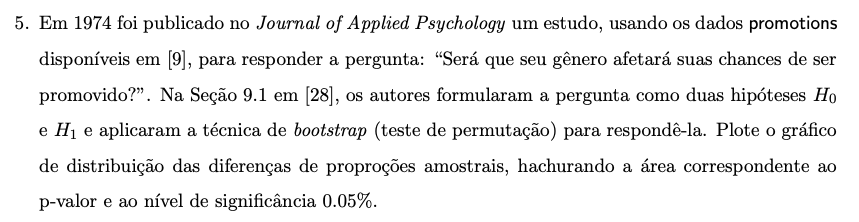

In [446]:
# Importa arquivo em rda
path = '/Users/pdcos/Documents/Estudos/Doutorado/IA376/analise_visual_ciencia_de_dados/participacao_9/promotions.rda'

df_promotions = pyreadr.read_r(path)

df_promotions = df_promotions['promotions']

df_promotions.head()

,id,decision,gender
0,1,promoted,male
1,2,promoted,male
2,3,promoted,male
3,4,promoted,male
4,5,promoted,male


A estatística de teste escolhida aqui é a diferença entre a proporção de homens e mulheres promovidos ($p_{m} - p_{f}$). Com isso, foram definidas as seguintes hipóteses:

- H₀: $p_{m} - p_{f} <= 0$ (homens são promovidos de maneira igual ou menos frequentemente que mulheres)
- H₁: $p_{m} - p_{f} > 0$ (homens são promovidos mais frequentemente que mulheres)

Para avaliar isso, realizou-se um bootstrapping ao 'embaralhar' o gênero das promoções no dataset.

In [447]:
#  Realiza o embaralhamento dos gêneros
def shuffle_gender(df):
    df_copy = df.copy(deep=True)
    
    gender = df_copy['gender']
    gender_index = np.random.permutation(df_copy.index)
    gender = gender[gender_index].values
    df_copy['gender'] = gender

    return df_copy

In [448]:

# Fazo o bootstrap para a diferença entre proporções
def bootstrap_mean_diff(df, n_bootstraps):
    mean_diffs = []

    for _ in range(n_bootstraps):
        df_shuffled = shuffle_gender(df)
        # Faz o calculo da diferença entre proporções
        
        # Proporcao de homens promovidos
        prop_homem = df_shuffled.loc[(df_shuffled['decision'] == 'promoted') & (df_shuffled['gender'] == 'male')].shape[0]  
        prop_homem = prop_homem / df_shuffled.loc[df_shuffled['gender'] == 'male'].shape[0]
        # Proporcao de mulheres promovidas
        prop_mulher = df_shuffled.loc[(df_shuffled['decision'] == 'promoted') & (df_shuffled['gender'] == 'female')].shape[0]  
        prop_mulher = prop_mulher / df_shuffled.loc[df_shuffled['gender'] == 'female'].shape[0]

        mean_diff = prop_homem - prop_mulher

        mean_diffs.append(mean_diff)
    
    return np.array(mean_diffs)

n_bootstraps = 1000

mean_diffs = bootstrap_mean_diff(df_promotions, n_bootstraps)

No histograma abaixo, verifica-se a distribuição dos dados obtidos a partir do bootstrapping. Pode-se notar ele tende à normalidade, sendo simétrico em torno de uma média 0, ou seja, se apresentar viés.

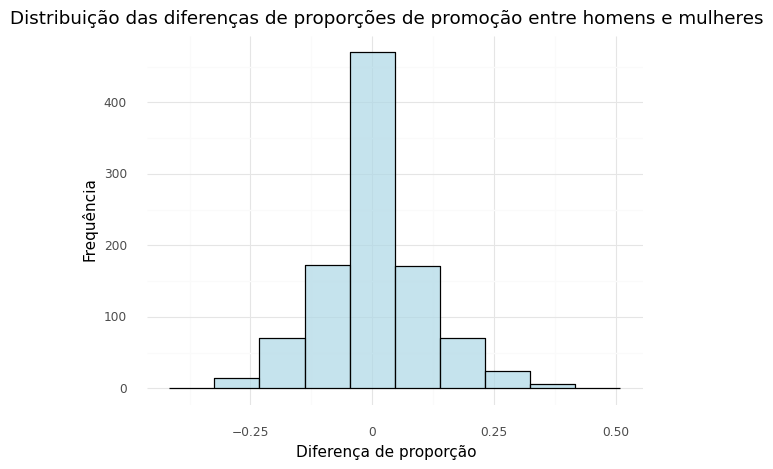

In [449]:
# printa o histograma
plot = (ggplot(pd.DataFrame({'mean_diffs': mean_diffs}), aes(x='mean_diffs')) +
        geom_histogram(bins=10, color='black', fill='lightblue', alpha=0.7) +
        theme_minimal() +
        labs(title='Distribuição das diferenças de proporções de promoção entre homens e mulheres',
             x='Diferença de proporção',
             y='Frequência'))

print(plot)


Para encontrar o p-valor, calculou-se a estatística de teste para o conjunto de dados original, conforme código abaixo.

In [450]:
prop_homem_original = df_promotions.loc[(df_promotions['decision'] == 'promoted') & (df_promotions['gender'] == 'male')].shape[0]
prop_homem_original = prop_homem_original / df_promotions.loc[df_promotions['gender'] == 'male'].shape[0]

prop_mulher_original = df_promotions.loc[(df_promotions['decision'] == 'promoted') & (df_promotions['gender'] == 'female')].shape[0]
prop_mulher_original = prop_mulher_original / df_promotions.loc[df_promotions['gender'] == 'female'].shape[0]

prop_diff_original = prop_homem_original - prop_mulher_original

print(f"A estatísticade teste para o experimento original é {prop_diff_original}")

A estatísticade teste para o experimento original é 0.29166666666666663


Para en

In [451]:
# Calcula o p-valor
p_value = np.mean(mean_diffs >= prop_diff_original)

print(f'p-valor: {p_value:.3f}')

p-valor: 0.031


Com o p-valor encontrado, foi plotado o histograma de bootstrapping, identificando a localização do p-valor. Os dados à direita do p-valor representam o número de vezes que mulheres tiveram uma proporção de promoções maior ou igual a homens na distribuição. Podemos perceber que a área total deste segmento é muito pequena em relação ao histograma completo. Além disso, o p-valor apresentou um valor menor que o nível de significância de 5%, indicando que podemos rejeitar a hipótese nula e concluir que homens são promovidos mais frequentemente que mulheres.

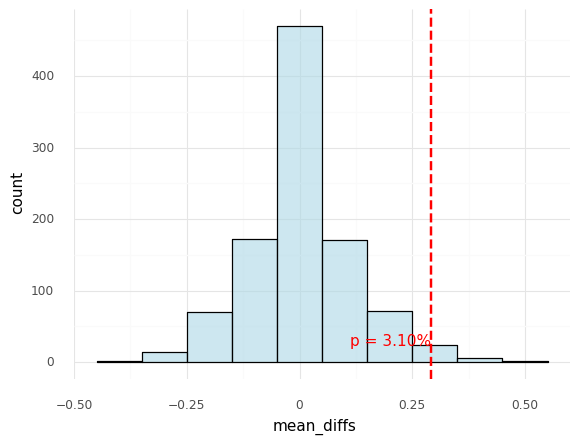

In [452]:
# Criar DataFrame a partir do vetor para o plot

df = pd.DataFrame({'mean_diffs': mean_diffs})

# Plot com histograma e áreas diferentes
plot = (
    ggplot(df, aes(x='mean_diffs')) +
    # Histograma base
    geom_histogram(
        aes(y=after_stat('count')), 
        binwidth=0.1, fill='lightblue', color='black', alpha=0.6
    ) +
    # Linha vertical no p_value
    geom_vline(xintercept=prop_diff_original, linetype='dashed', color='red', size=1) +
    # Anotação do p_value
    annotate('text', x=prop_diff_original, y=30, label=f'p = {p_value * 100:.2f}%', color='red', ha='right') +
    theme_minimal()
)

print(plot)


Agora, realizaremos o bootstrapping sem permutação de modo a encontrar os valores num intervalo de confiança de 5%.

In [453]:


def bootstrap_mean_diff_without_permute(df, n_bootstraps):
    mean_diffs = []

    for _ in range(n_bootstraps):
        # Samples with replacement

        df_sample = df.sample(frac=1, replace=True)
        # Faz o calculo da diferença entre proporções
        
        # Proporcao de homens promovidos
        prop_homem = df_sample.loc[(df_sample['decision'] == 'promoted') & (df_sample['gender'] == 'male')].shape[0]  
        prop_homem = prop_homem / df_sample.loc[df_sample['gender'] == 'male'].shape[0]
        # Proporcao de mulheres promovidas
        prop_mulher = df_sample.loc[(df_sample['decision'] == 'promoted') & (df_sample['gender'] == 'female')].shape[0]  
        prop_mulher = prop_mulher / df_sample.loc[df_sample['gender'] == 'female'].shape[0]

        mean_diff = prop_homem - prop_mulher

        mean_diffs.append(mean_diff)
    
    return np.array(mean_diffs)

n_bootstraps = 1000

mean_diffs_replacement = bootstrap_mean_diff_without_permute(df_promotions, n_bootstraps)

In [454]:
# Encontra os percentis 0.025 e 0.975
percentil_025 = np.percentile(mean_diffs_replacement, 2.5)
percentil_975 = np.percentile(mean_diffs_replacement, 97.5)

print(f'Percentil 0.025: {percentil_025:.3f}') 
print(f'Percentil 0.975: {percentil_975:.3f}')

Percentil 0.025: 0.053
Percentil 0.975: 0.529


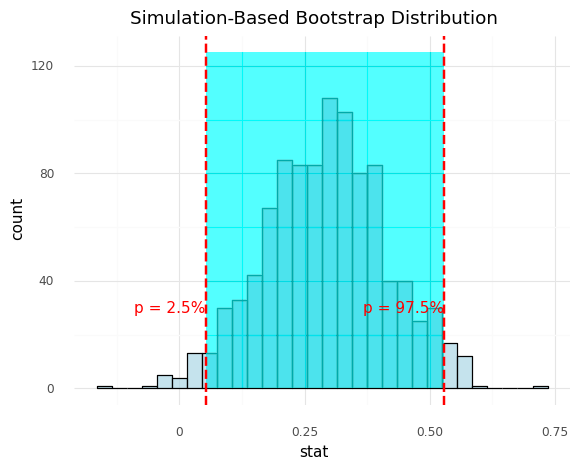

In [455]:
# Create a DataFrame from the bootstrap distribution
df = pd.DataFrame({'stat': mean_diffs_replacement})

# Define the endpoints for the confidence interval
lower_bound = percentil_025
upper_bound = percentil_975

# Create the plot
plot = (
    ggplot(df, aes(x='stat')) +
    geom_histogram(bins=30, fill='lightblue', color='black', alpha=0.7) +
    geom_rect(aes(xmin=lower_bound, xmax=upper_bound, ymin=0, ymax=125), 
              fill='cyan', alpha=0.01) +
    labs(title='Simulation-Based Bootstrap Distribution', x='stat', y='count') +
    geom_vline(xintercept=lower_bound, linetype='dashed', color='red', size=1) +
    geom_vline(xintercept=upper_bound, linetype='dashed', color='red', size=1) +
    annotate('text', x=percentil_025, y=30, label=f'p = 2.5%', color='red', ha='right') +
    annotate('text', x=percentil_975, y=30, label=f'p = 97.5%', color='red', ha='right') +
    theme_minimal()
)

print(plot)


No gráfico acima, é possível notar que existe um deslocamento do histograma para valores posiivos, dando mais indícios e que a hipótese alternativa é verdadeira.

# Exercício 6

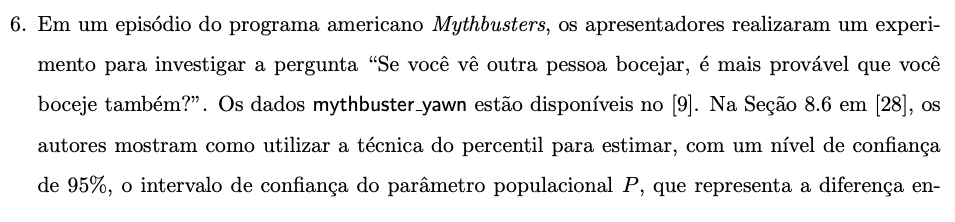

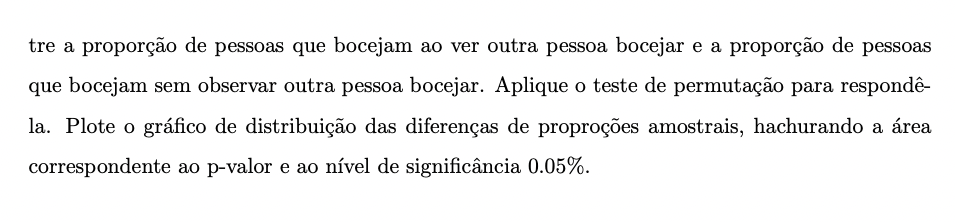

In [456]:
# Importa arquivo em rda
path = '/Users/pdcos/Documents/Estudos/Doutorado/IA376/analise_visual_ciencia_de_dados/participacao_9/mythbusters_yawn.rda'

df_yawn = pyreadr.read_r(path)['mythbusters_yawn']

df_yawn.head()


,subj,group,yawn
0,1,seed,yes
1,2,control,yes
2,3,seed,no
3,4,seed,yes
4,5,seed,no


Aqui, a estatística definica foi a diferença entre as proporções de pessoas que bocejaram do grupo de experimento e de controle ($p_s - p_c$)

- H₀: O bocejo não influencia ($p_s - p_c <= 0$)
- H₁: O bocejo é contagioso ($p_s - p_c > 0$)

Para isso, utilizou-se o mesmo procedimento que o do item anterior - realizou-se a permutação dos dados, em seguida, o cálculo da estatística de teste no conjunto original para gerar o p-valor e, por fim, o bootstrapping sem permutação para visualização do intervalo de confiança dos dados.

## Bootstrapping com permutação

In [457]:
def shuffle_gender(df):
    df_copy = df.copy(deep=True)
    
    gender = df_copy['yawn']
    gender_index = np.random.permutation(df_copy.index)
    gender = gender[gender_index].values
    df_copy['yawn'] = gender

    return df_copy

def bootstrap_mean_diff(df, n_bootstraps):
    mean_diffs = []

    for _ in range(n_bootstraps):
        df_shuffled = shuffle_gender(df)
        # Faz o calculo da diferença entre proporções
        
        # Proporcao de homens promovidos
        prop_seed = df_shuffled.loc[(df_shuffled['yawn'] == 'yes') & (df_shuffled['group'] == 'seed')].shape[0]  
        prop_seed = prop_seed / df_shuffled.loc[df_shuffled['group'] == 'seed'].shape[0]
        # Proporcao de mulheres promovidas
        prop_control = df_shuffled.loc[(df_shuffled['yawn'] == 'yes') & (df_shuffled['group'] == 'control')].shape[0]  
        prop_control = prop_control / df_shuffled.loc[df_shuffled['group'] == 'control'].shape[0]

        mean_diff = prop_seed - prop_control

        mean_diffs.append(mean_diff)
    
    return np.array(mean_diffs)

n_bootstraps = 1000

mean_diffs = bootstrap_mean_diff(df_yawn, n_bootstraps)

## Cálculo da estatística de teste no conjunto original

In [458]:
# Proporcao de homens promovidos
prop_seed = df_yawn.loc[(df_yawn['yawn'] == 'yes') & (df_yawn['group'] == 'seed')].shape[0]  
prop_seed = prop_seed / df_yawn.loc[df_yawn['group'] == 'seed'].shape[0]
# Proporcao de mulheres promovidas
prop_control = df_yawn.loc[(df_yawn['yawn'] == 'yes') & (df_yawn['group'] == 'control')].shape[0]  
prop_control = prop_control / df_yawn.loc[df_yawn['group'] == 'control'].shape[0]

prop_diff_original = prop_seed - prop_control

print(f"O valor crítico é: {prop_diff_original}")

p_value = np.mean(mean_diffs >= prop_diff_original)

print(f"O p-valor é: {p_value:.3f}")


O valor crítico é: 0.04411764705882354
O p-valor é: 0.501


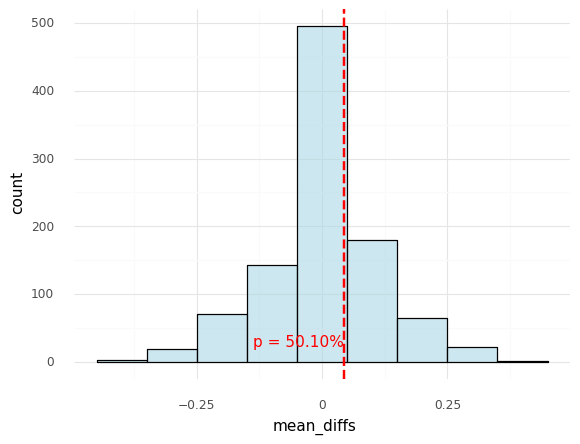

In [459]:
# Criar DataFrame a partir do vetor para o plot

df = pd.DataFrame({'mean_diffs': mean_diffs})

# Plot com histograma e áreas diferentes
plot = (
    ggplot(df, aes(x='mean_diffs')) +
    # Histograma base
    geom_histogram(
        aes(y=after_stat('count')), 
        binwidth=0.1, fill='lightblue', color='black', alpha=0.6
    ) +
    # Linha vertical no p_value
    geom_vline(xintercept=prop_diff_original, linetype='dashed', color='red', size=1) +
    # Anotação do p_value
    annotate('text', x=prop_diff_original, y=30, label=f'p = {p_value * 100:.2f}%', color='red', ha='right') +
    theme_minimal()
)

print(plot)


Neste gráfico, pode-se notar que o p-value tem um valor muito elevado, e que a proporção à direita dele corresponde à uma porção muito grande do gráfico. Deste modo, não temos evidência o suficiente  para rejeitar a hipótese nula - NÃO pudemos concluir que o bocejo é contagioso.

## Visualização do intervalo de confiança

In [460]:


def bootstrap_mean_diff_without_permute(df, n_bootstraps):
    mean_diffs = []

    for _ in range(n_bootstraps):
        # Samples with replacement

        df_sample = df.sample(frac=1, replace=True)
        # Faz o calculo da diferença entre proporções
        
        # Proporcao de homens promovidos
        prop_seed = df_sample.loc[(df_sample['yawn'] == 'yes') & (df_sample['group'] == 'seed')].shape[0]  
        prop_seed = prop_seed / df_sample.loc[df_sample['group'] == 'seed'].shape[0]
        # Proporcao de mulheres promovidas
        prop_control = df_sample.loc[(df_sample['yawn'] == 'yes') & (df_sample['group'] == 'control')].shape[0]  
        prop_control = prop_control / df_sample.loc[df_sample['group'] == 'control'].shape[0]


        mean_diff = prop_seed - prop_control

        mean_diffs.append(mean_diff)
    
    return np.array(mean_diffs)

n_bootstraps = 1000

mean_diffs_replacement = bootstrap_mean_diff_without_permute(df_yawn, n_bootstraps)

In [461]:
# Encontra os percentis 0.025 e 0.975
percentil_025 = np.percentile(mean_diffs_replacement, 2.5)
percentil_975 = np.percentile(mean_diffs_replacement, 97.5)

print(f'Percentil 0.025: {percentil_025:.3f}') 
print(f'Percentil 0.975: {percentil_975:.3f}')

Percentil 0.025: -0.234
Percentil 0.975: 0.278


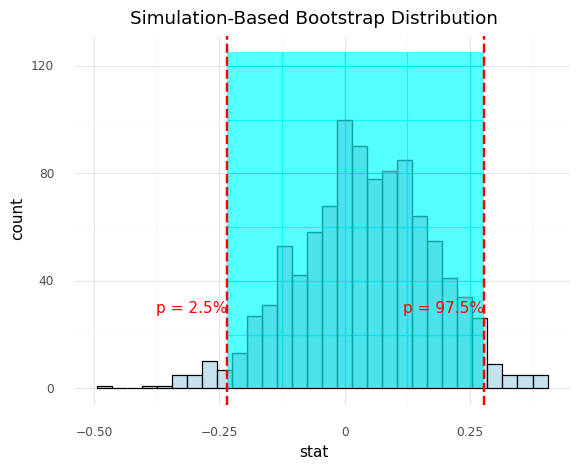

In [462]:
# Create a DataFrame from the bootstrap distribution
df = pd.DataFrame({'stat': mean_diffs_replacement})

# Define the endpoints for the confidence interval
lower_bound = percentil_025
upper_bound = percentil_975

# Create the plot
plot = (
    ggplot(df, aes(x='stat')) +
    geom_histogram(bins=30, fill='lightblue', color='black', alpha=0.7) +
    geom_rect(aes(xmin=lower_bound, xmax=upper_bound, ymin=0, ymax=125), 
              fill='cyan', alpha=0.01) +
    labs(title='Simulation-Based Bootstrap Distribution', x='stat', y='count') +
    geom_vline(xintercept=lower_bound, linetype='dashed', color='red', size=1) +
    geom_vline(xintercept=upper_bound, linetype='dashed', color='red', size=1) +
    annotate('text', x=percentil_025, y=30, label=f'p = 2.5%', color='red', ha='right') +
    annotate('text', x=percentil_975, y=30, label=f'p = 97.5%', color='red', ha='right') +
    theme_minimal()
)

print(plot)
